<a href="https://colab.research.google.com/github/Suraez/tensorflow-hands_on/blob/main/NLP/twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/cosmos98/twitter-and-reddit-sentimental-analysis-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: surajkumarojha
Your Kaggle Key: ··········


100%|██████████| 10.0M/10.0M [00:00<00:00, 68.0MB/s]

In [3]:
import pandas as pd
df = pd.read_csv('/content/twitter-and-reddit-sentimental-analysis-dataset/Twitter_Data.csv')

In [4]:
df.columns

Index(['clean_text', 'category'], dtype='object')

In [5]:
df.shape

(162980, 2)

In [6]:
df = df.head(500)

In [7]:
df.shape

(500, 2)

In [8]:
df.index

RangeIndex(start=0, stop=500, step=1)

In [9]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [10]:
for i, row in df.iterrows():
  print(row['clean_text'])

when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples
talk all the nonsense and continue all the drama will vote for modi 
what did just say vote for modi  welcome bjp told you rahul the main campaigner for modi think modi should just relax
asking his supporters prefix chowkidar their names modi did great service now there confusion what read what not now crustal clear what will crass filthy nonsensical see how most abuses are coming from chowkidars
answer who among these the most powerful world leader today trump putin modi may 
kiya tho refresh maarkefir comment karo 
surat women perform yagna seeks divine grace for narendra modi become again

this comes from cabinet which has scholars like modi smriti and hema time introspect
with upcoming election india saga going important pair look current modi leads govt elected with deal br

In [11]:
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm

In [12]:
sentimentStats = {
    'pos': 0,
    'neu': 0,
    'neg': 0
}

for i, row in df.iterrows():
  if row['category'] == 1.0:
    sentimentStats['pos'] += 1
  elif row['category'] == 0.0:
    sentimentStats['neu'] += 1
  else:
    sentimentStats['neg'] += 1

sentimentStats


{'pos': 209, 'neu': 188, 'neg': 103}

In [13]:
df['category'].value_counts()

 1.0    209
 0.0    188
-1.0    103
Name: category, dtype: int64

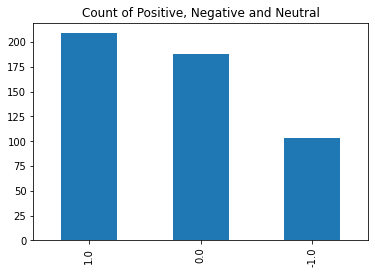

In [14]:
df['category'].value_counts().plot(kind='bar', title="Count of Positive, Negative and Neutral")
plt.show() # removes weird title at the top and opens the figure in the current window

In [15]:
df.iloc[10]['clean_text']

'things like demonetisation gst goods and services tax…the upper castes would sort either view favourably say that need give this more time other castes like dalits the muslims were more against because that’ just not modi’ constituency2'

In [16]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [17]:
tokens = nltk.word_tokenize(df.iloc[1]['clean_text'])

In [18]:
taggedSentence = nltk.pos_tag(tokens)

In [19]:
!pip install svgling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 KB 4.6 MB/s eta 0:00:00


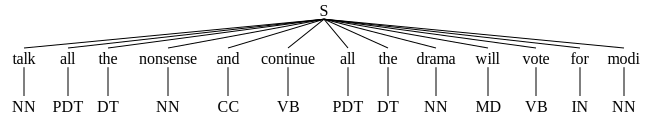

In [20]:
chunked_text = nltk.chunk.ne_chunk(taggedSentence)
chunked_text

In [21]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [22]:
sia = SentimentIntensityAnalyzer()
sentence = df['clean_text'][10]
sia.polarity_scores(sentence)

{'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'compound': 0.6124}

In [23]:
sentimentDict = sia.polarity_scores(sentence)
sentiment = max(sentimentDict, key=sentimentDict.get)
sentiment

'neu'

In [24]:
sentence = df['clean_text'][0]
sentimentDict = sia.polarity_scores(sentence)
print(sentimentDict)
sentiment = max(sentimentDict, key=sentimentDict.get)
print(sentiment)

{'neg': 0.065, 'neu': 0.781, 'pos': 0.154, 'compound': 0.5267}
neu


In [25]:
sentimentCompare = []
sentimentMapDict = {
    'pos': 1.0,
    'neu': 0.0,
    'neg': -1.0
}
index = 0
for i, row in tqdm(df.iterrows()):
  try:
    sentimentCompareDict = {}
    sentence = row['clean_text']
    sentimentDict = sia.polarity_scores(sentence)
    sentimentDict.pop('compound')
    sentiment = max(sentimentDict, key=sentimentDict.get)
    sentimentCompareDict['Id'] = index
    sentimentCompareDict['vader'] = sentimentMapDict[sentiment]
    sentimentCompareDict['original'] = row['category']
    sentimentCompare.append(sentimentCompareDict)
    index += 1
  except Exception:
    print("error occured for id", index)



0it [00:00, ?it/s]

error occured for id 148


In [26]:
sentimentCompare

[{'Id': 0, 'vader': 0.0, 'original': -1.0},
 {'Id': 1, 'vader': 0.0, 'original': 0.0},
 {'Id': 2, 'vader': 0.0, 'original': 1.0},
 {'Id': 3, 'vader': 0.0, 'original': 1.0},
 {'Id': 4, 'vader': 0.0, 'original': 1.0},
 {'Id': 5, 'vader': 0.0, 'original': 0.0},
 {'Id': 6, 'vader': 0.0, 'original': 0.0},
 {'Id': 7, 'vader': 0.0, 'original': 0.0},
 {'Id': 8, 'vader': 0.0, 'original': 1.0},
 {'Id': 9, 'vader': 0.0, 'original': 1.0},
 {'Id': 10, 'vader': 0.0, 'original': 1.0},
 {'Id': 11, 'vader': 0.0, 'original': 1.0},
 {'Id': 12, 'vader': 0.0, 'original': 1.0},
 {'Id': 13, 'vader': 0.0, 'original': 0.0},
 {'Id': 14, 'vader': 0.0, 'original': 0.0},
 {'Id': 15, 'vader': 0.0, 'original': -1.0},
 {'Id': 16, 'vader': 0.0, 'original': 0.0},
 {'Id': 17, 'vader': 0.0, 'original': 0.0},
 {'Id': 18, 'vader': 0.0, 'original': 1.0},
 {'Id': 19, 'vader': 0.0, 'original': -1.0},
 {'Id': 20, 'vader': 0.0, 'original': 1.0},
 {'Id': 21, 'vader': 0.0, 'original': -1.0},
 {'Id': 22, 'vader': 0.0, 'original': 

In [27]:
res = pd.DataFrame(sentimentCompare)

In [28]:
res.shape
res

,Id,vader,original
0,0,0.0,-1.0
1,1,0.0,0.0
2,2,0.0,1.0
3,3,0.0,1.0
4,4,0.0,1.0
...,...,...,...
494,494,0.0,1.0
495,495,0.0,-1.0
496,496,0.0,-1.0
497,497,0.0,1.0


In [29]:
print(res['vader'].value_counts()) # vader analysis
print(res['original'].value_counts())

 0.0    477
 1.0     14
-1.0      8
Name: vader, dtype: int64
 1.0    209
 0.0    187
-1.0    103
Name: original, dtype: int64


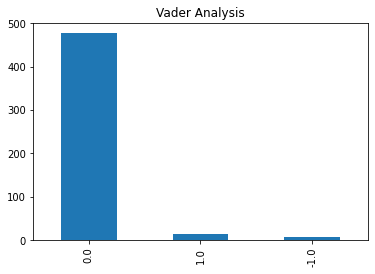

In [30]:
res['vader'].value_counts().plot(kind='bar', title='Vader Analysis')
plt.show()

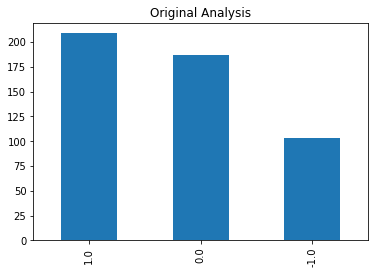

In [31]:
res['original'].value_counts().plot(kind='bar', title='Original Analysis')
plt.show()

In [32]:
res['vader'].value_counts()

 0.0    477
 1.0     14
-1.0      8
Name: vader, dtype: int64

In [33]:
res['original'].value_counts()

 1.0    209
 0.0    187
-1.0    103
Name: original, dtype: int64

In [34]:
vader = dict(res['vader'].value_counts())
vader = list(vader.values())
original = dict(res['original'].value_counts())
original = list(original.values())
original[0], original[1] = original[1], original[0]
print(vader, original)

[477, 14, 8] [187, 209, 103]


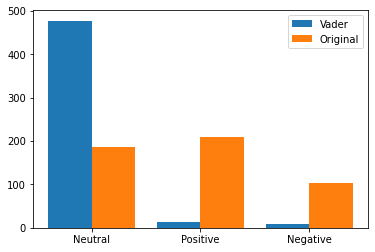

In [35]:
import numpy as np
xAxisTitle = ['Neutral', 'Positive', 'Negative']
xAxis = np.arange(len(xAxisTitle))
plt.bar(xAxis-0.2, vader, width=0.4, label='Vader')
plt.bar(xAxis+0.2, original, width=0.4, label='Original')
plt.xticks(xAxis, xAxisTitle)
plt.legend()
plt.show()

we can see above VADER doesn't perform well in case of twitter dataset. It predicts mostly neutral


### TODO: USE transformer model to see the comparision between original and transformer model prediction

In [36]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 49.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 91.2 MB/s eta 0:00:00


In [37]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [38]:
task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [39]:
def roberta_polarity_scores(example):
  encoded_text = tokenizer(example, return_tensors='pt')
  output = model(**encoded_text)

  score = output[0][0].detach().numpy()
  softmax_score = softmax(score)
  # print(softmax_score)
  return {
    'neg': softmax_score[0],
    'neu': softmax_score[1],
    'pos': softmax_score[2]
  }

In [40]:
res = roberta_polarity_scores("this is neither good nor bad")

In [41]:
res

{'neg': 0.07716769, 'neu': 0.36436126, 'pos': 0.55847096}

In [42]:
sentimentCompare = []
sentimentMapDict = {
    'pos': 1.0,
    'neu': 0.0,
    'neg': -1.0
}
index = 0
for i, row in tqdm(df.iterrows()):
  try:
    sentimentCompareDict = {}
    sentence = row['clean_text']
    # vader approach
    sentimentDict = sia.polarity_scores(sentence)
    sentimentDict.pop('compound')
    vaderSentiment = max(sentimentDict, key=sentimentDict.get)

    # RoBERTA approach
    robertaSentimentDict = roberta_polarity_scores(sentence)
    robertaSentiment = max(robertaSentimentDict, key=robertaSentimentDict.get)

    sentimentCompareDict['Id'] = index
    sentimentCompareDict['vader'] = sentimentMapDict[vaderSentiment]
    sentimentCompareDict['roberta'] = sentimentMapDict[robertaSentiment]
    sentimentCompareDict['original'] = row['category']
    sentimentCompare.append(sentimentCompareDict)
    index += 1
  except Exception:
    print("error occured for id", index)

0it [00:00, ?it/s]

error occured for id 148


In [43]:
sentimentCompare[:10]

[{'Id': 0, 'vader': 0.0, 'roberta': -1.0, 'original': -1.0},
 {'Id': 1, 'vader': 0.0, 'roberta': -1.0, 'original': 0.0},
 {'Id': 2, 'vader': 0.0, 'roberta': 0.0, 'original': 1.0},
 {'Id': 3, 'vader': 0.0, 'roberta': -1.0, 'original': 1.0},
 {'Id': 4, 'vader': 0.0, 'roberta': 0.0, 'original': 1.0},
 {'Id': 5, 'vader': 0.0, 'roberta': 0.0, 'original': 0.0},
 {'Id': 6, 'vader': 0.0, 'roberta': 0.0, 'original': 0.0},
 {'Id': 7, 'vader': 0.0, 'roberta': 0.0, 'original': 0.0},
 {'Id': 8, 'vader': 0.0, 'roberta': 0.0, 'original': 1.0},
 {'Id': 9, 'vader': 0.0, 'roberta': -1.0, 'original': 1.0}]

In [44]:
sdf = pd.DataFrame(sentimentCompare)
sdf

,Id,vader,roberta,original
0,0,0.0,-1.0,-1.0
1,1,0.0,-1.0,0.0
2,2,0.0,0.0,1.0
3,3,0.0,-1.0,1.0
4,4,0.0,0.0,1.0
...,...,...,...,...
494,494,0.0,0.0,1.0
495,495,0.0,-1.0,-1.0
496,496,0.0,-1.0,-1.0
497,497,0.0,-1.0,1.0


In [45]:
sdf['vader'].value_counts()

 0.0    477
 1.0     14
-1.0      8
Name: vader, dtype: int64

In [46]:
sdf['roberta'].value_counts()

 0.0    256
-1.0    181
 1.0     62
Name: roberta, dtype: int64

In [47]:
sdf['original'].value_counts()

 1.0    209
 0.0    187
-1.0    103
Name: original, dtype: int64

In [60]:
def find_prediction(key):
  prediction = dict(sdf[key].value_counts())
  predictionList = list(prediction.values())
  return predictionList


In [61]:
vaderPrediction = dict(sdf['vader'].value_counts())
vaderPredictionList = list(vaderPrediction.values())
print(vaderPrediction)
print(vaderPredictionList)

{0.0: 477, 1.0: 14, -1.0: 8}
[477, 14, 8]


In [62]:
originalPrediction = dict(sdf['original'].value_counts())
originalPredictionList = list(originalPrediction.values())
print(originalPrediction)
print(originalPredictionList)

{1.0: 209, 0.0: 187, -1.0: 103}
[209, 187, 103]


In [66]:
robertaPrediction = dict(sdf['roberta'].value_counts())
robertaPrediction

{0.0: 256, -1.0: 181, 1.0: 62}

In [63]:
vaderPrediction = find_prediction('vader')
vaderPrediction

[477, 14, 8]

In [69]:
originalPrediction = find_prediction('original')
originalPrediction[0], originalPrediction[1] = originalPrediction[1], originalPrediction[0]
originalPrediction

[187, 209, 103]

In [70]:
robertaPrediction = find_prediction('roberta')
robertaPrediction[1], robertaPrediction[2] = robertaPrediction[2], robertaPrediction[1]
robertaPrediction

[256, 62, 181]

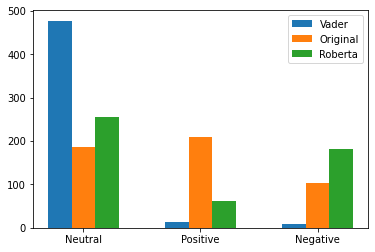

In [72]:
import numpy as np
xAxisTitle = ['Neutral', 'Positive', 'Negative']
xAxis = np.arange(len(xAxisTitle))
plt.bar(xAxis-0.2, vaderPrediction, width=0.2, label='Vader')
plt.bar(xAxis, originalPrediction, width=0.2, label='Original')
plt.bar(xAxis+0.2, robertaPrediction, width=0.2, label='Roberta')
plt.xticks(xAxis, xAxisTitle)
plt.legend()
plt.show()

CONCLUSION: Roberta model from transformer is way much better than Vader approach as difference between roberta and original in each category ['netural', 'positive', 'negative' ] is less than that of vader an roberta